In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle


from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
#Load in the data with the code provided by the kaggle dataset.
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
        return dict

data_pre_path = '/Users/amitchandna/Documents/Data_Science/Github/c100_project/data/archive/' # change this path
# File paths 
data_train_path = data_pre_path + 'train'
data_test_path = data_pre_path + 'test'
# Read dictionary
data_train_dict = unpickle(data_train_path)
data_test_dict = unpickle(data_test_path)
# Get data (change the coarse_labels if you want to use the 100 classes)
data_train = data_train_dict[b'data']
label_train = np.array(data_train_dict[b'coarse_labels'])
data_test = data_test_dict[b'data']
label_test = np.array(data_test_dict[b'coarse_labels'])

## Model Development

In [3]:
ran_4_clf = RandomForestClassifier(verbose=True,n_jobs=-1)
ran_4_clf.fit(data_train,label_train)
ran_4_clf.score(data_train,label_train)
y_pred_ran4 = ran_4_clf.predict(data_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   50.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.2s finished


In [4]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(data_train,label_train)
tree_clf.score(data_train,label_train)
y_pred_tree = tree_clf.predict(data_train)

In [5]:
bagg_clf = BaggingClassifier()
bagg_clf.fit(data_train,label_train)
bagg_clf.score(data_train,label_train)
y_pred_bagg = bagg_clf.predict(data_train)

In [6]:
#Feature reduction required - without a reduction in dimensionality, it scores at 0.47 with a desire for more iterations.
log_reg = LogisticRegression(max_iter=1000000)
log_reg.fit(data_train,label_train)
log_reg.score(data_train,label_train)

/Users/amitchandna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.47306

In [8]:
#Not a great model - only returns a score of 0.43...
knn_clf = KNeighborsClassifier(n_jobs=-1)
knn_clf.fit(data_train,label_train)
knn_clf.score(data_train,label_train)

0.43498

In [9]:
vote_clf = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn_clf),('bagg', bagg_clf)],voting='soft')
vote_clf.fit(data_train,label_train)
vote_clf.score(data_train,label_train)
y_pred_vote = vote_clf.predict(data_train)

/Users/amitchandna/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#This classifier is also not so great (0.18)
#b00st_clf = AdaBoostClassifier()
#b00st_clf.fit(data_train,label_train)
#b00st_clf.score(data_train,label_train)

## Confusion Matrices
Good to see if the models are running well first and then add in the element of feature reduction to speed up the models

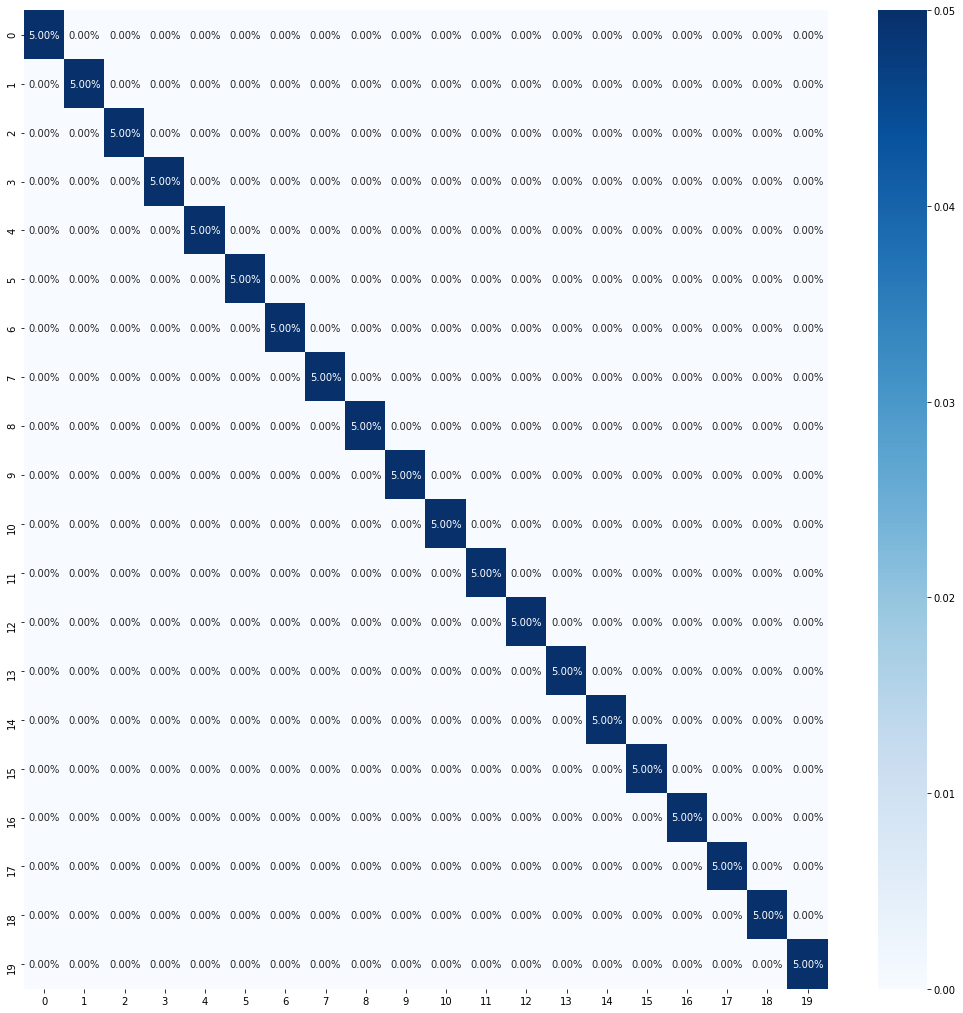

In [28]:
cf_matrix_4st = confusion_matrix(label_train,y_pred_ran4)
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(cf_matrix_4st/np.sum(cf_matrix_4st),fmt='.2%', annot=True,cmap ='Blues')
#cf_matrix_4st

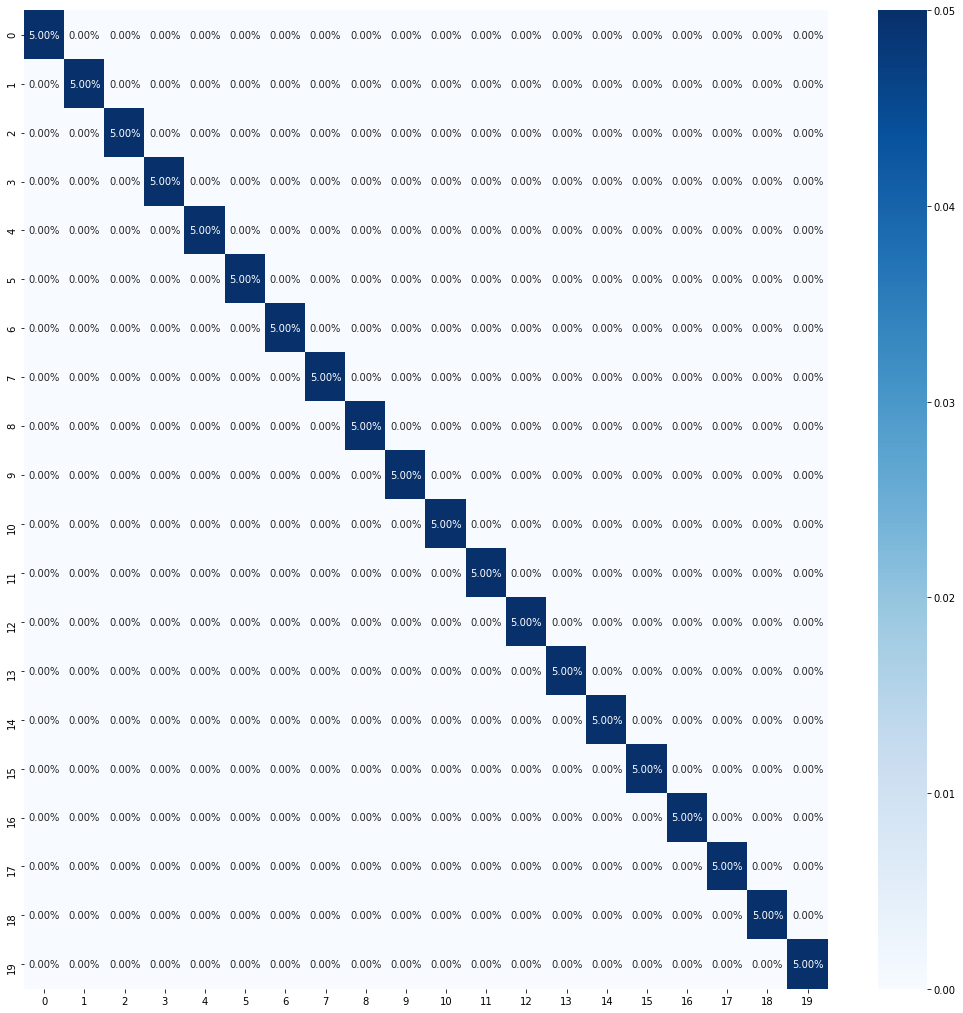

In [27]:
cf_matrix_tree = confusion_matrix(label_train, y_pred_tree)
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(cf_matrix_tree/np.sum(cf_matrix_tree), annot=True,fmt='.2%',cmap='Blues')

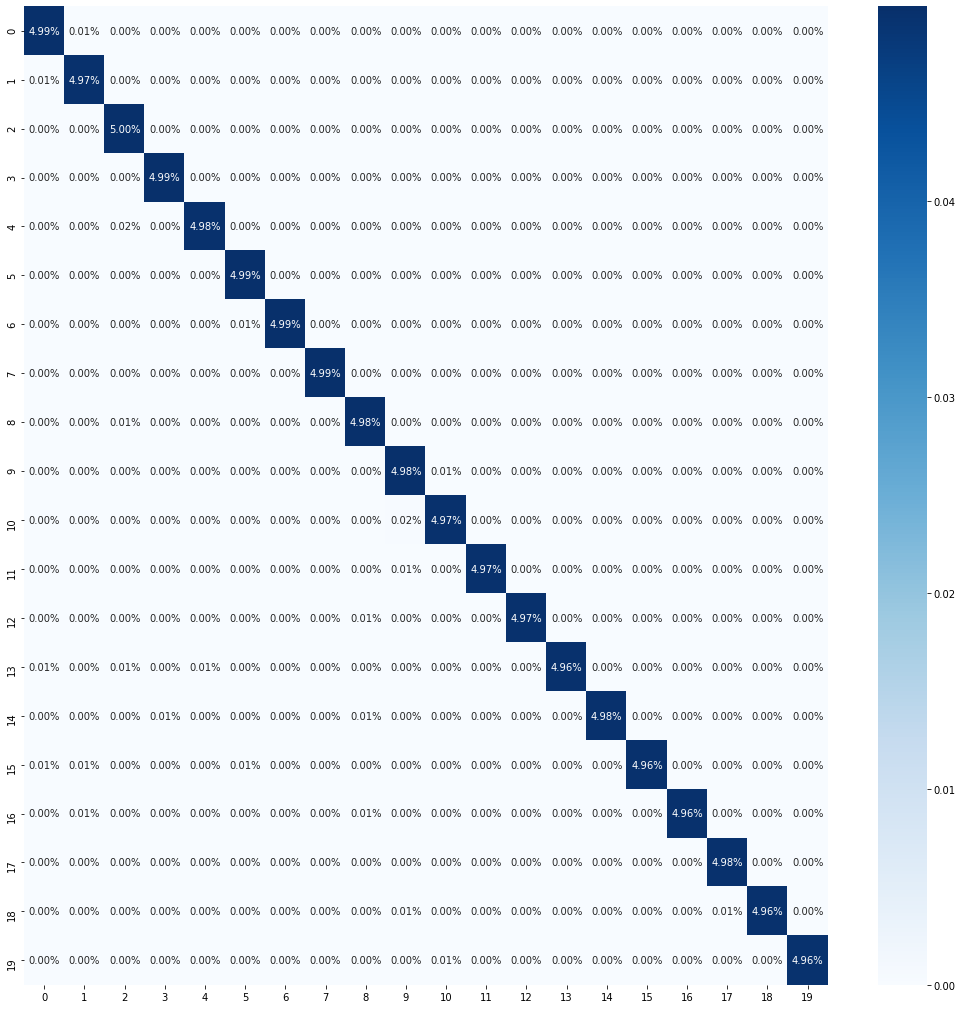

In [29]:
cf_matrix_bag = confusion_matrix(label_train,y_pred_bagg)
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(cf_matrix_bag/np.sum(cf_matrix_bag), annot=True,fmt='.2%',cmap='Blues')

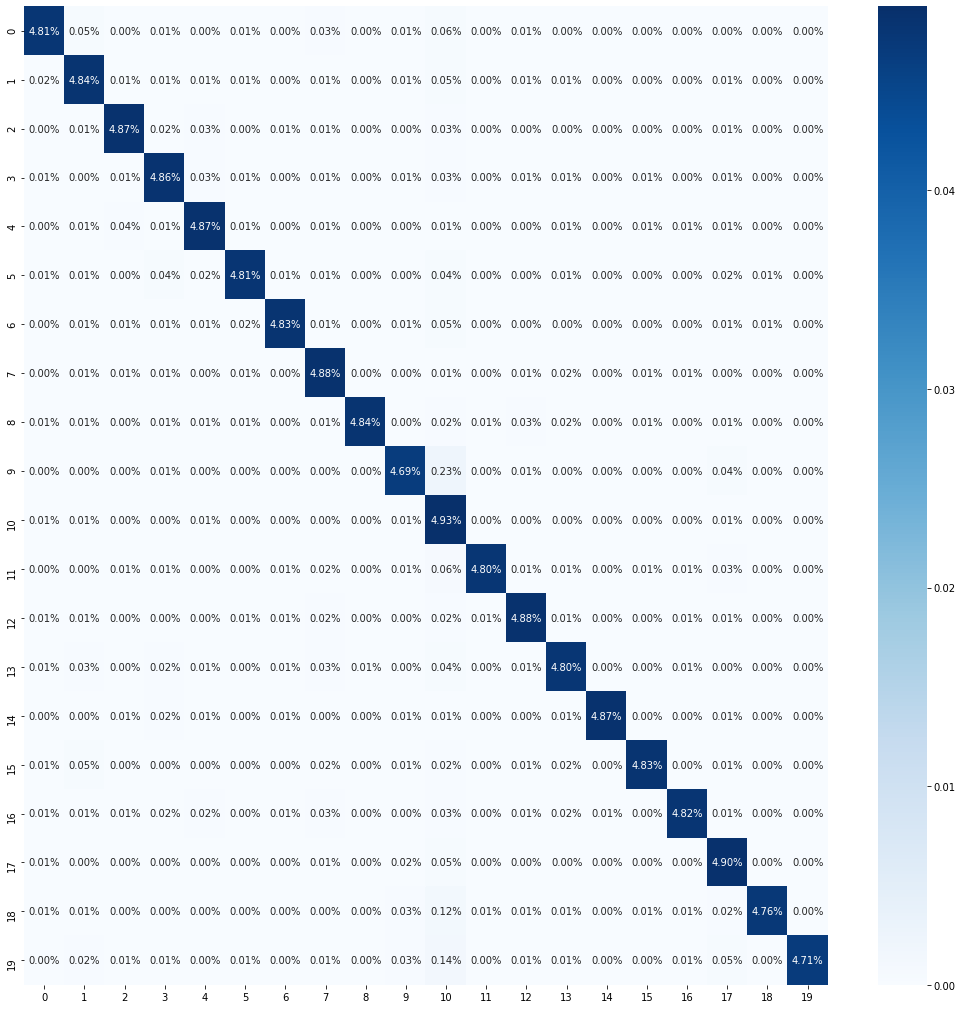

In [30]:
cf_matrix_vote = confusion_matrix(label_train, y_pred_vote)
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(cf_matrix_vote/np.sum(cf_matrix_vote), annot=True,fmt='.2%',cmap='Blues')

## Pickling
Here we will pickle the best models for future ML purposes

In [21]:
#Best_model
filename = 'Best_Model'
pickle.dump(ran_4_clf, open(filename, 'wb'))

In [22]:
#Second Best Model(Silver)
filename_1 = 'Second_best_model'
pickle.dump(tree_clf, open(filename_1, 'wb'))

In [23]:
#Third_Best_Model (Bronze)
filename_2 = 'Third_Best_Model'
pickle.dump(bagg_clf, open(filename_2, 'wb'))

# Open the Pickle File for best model

In [34]:
with open('Best_Model', 'rb') as f:
    model = pickle.load(f)

## Feature Reduction
The models take quite a bit of time to run in this current scenario, based on the models that are seen above, we will use PCA to reduce the features in these images